# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`
$$d_wQ = -2(y - Xw)^\top dw$$

$$\nabla_w Q(w) = -2X^\top(y - Xw)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

Ник: mgreztsova@edu.hse.ru
Ссылки на успешные посылки:
https://contest.yandex.ru/contest/70588/run-report/124355841/
https://contest.yandex.ru/contest/70588/run-report/124355915/
https://contest.yandex.ru/contest/70588/run-report/124355965/
https://contest.yandex.ru/contest/70588/run-report/124356008/
https://contest.yandex.ru/contest/70588/run-report/124141348/
https://contest.yandex.ru/contest/70588/run-report/124356182/

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    predictions = self.predict(x)
    errors = predictions - y
    gradient = (2 / len(y)) * x.T.dot(errors)  # пример для MSE
    return gradient


In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


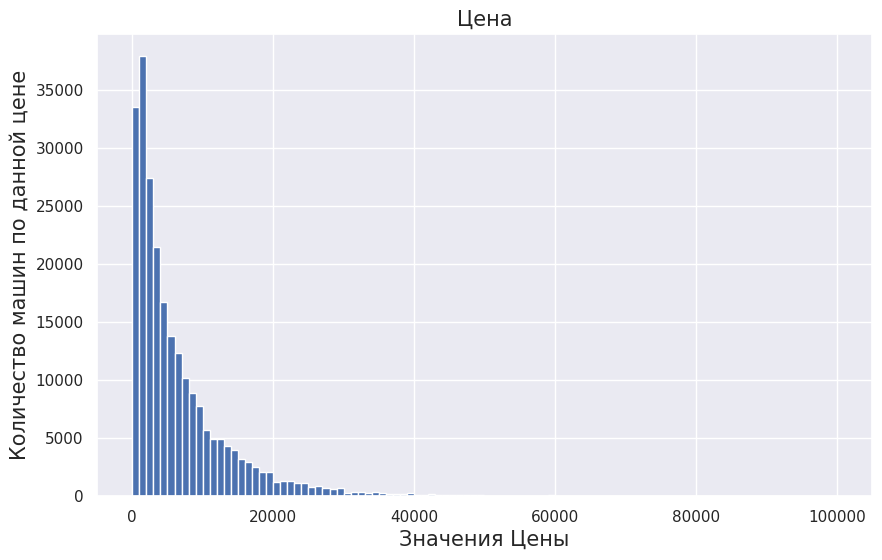

In [10]:
plt.figure(figsize = (10, 6))
plt.hist(data['price'], bins=100)
plt.xlabel('Значения Цены', fontsize=15)
plt.ylabel('Количество машин по данной цене', fontsize=15)
plt.title('Цена', fontsize=15)
plt.show()

In [11]:
df = data.copy()
df['log_price'] = np.log1p(df[['price']])

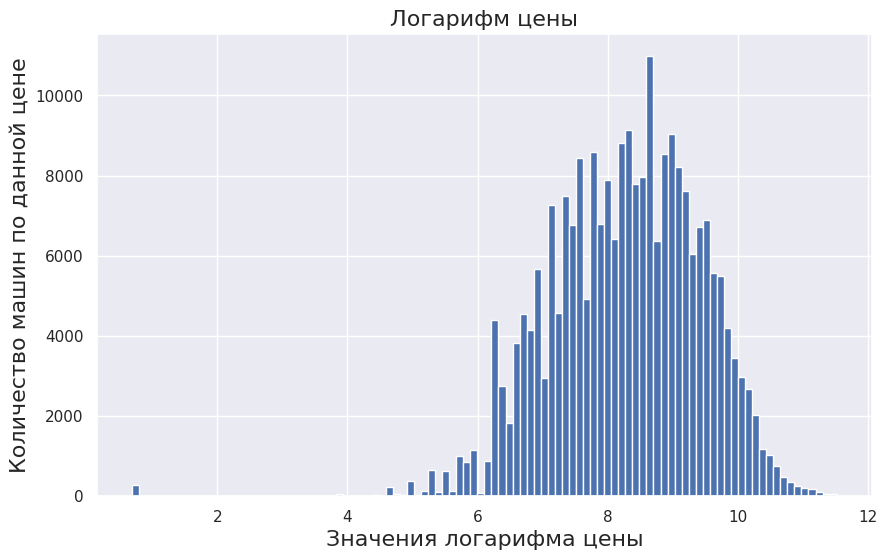

In [12]:
plt.figure(figsize = (10, 6))
plt.hist(df['log_price'], bins=100)
plt.xlabel('Значения логарифма цены', fontsize=16)
plt.ylabel('Количество машин по данной цене', fontsize=16)
plt.title('Логарифм цены', fontsize=16)
plt.show()

С логарифмом цены удобнее работать, можем также наблюдать выбросы.

In [13]:
data['log_price'] = np.log1p(data[['price']])

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Проанализируем зависимость остальных переменных от цены:

In [14]:
categorical = ['brand', 'model', 'vehicleType', 'notRepairedDamage', 'gearbox', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

Категориальные переменные:

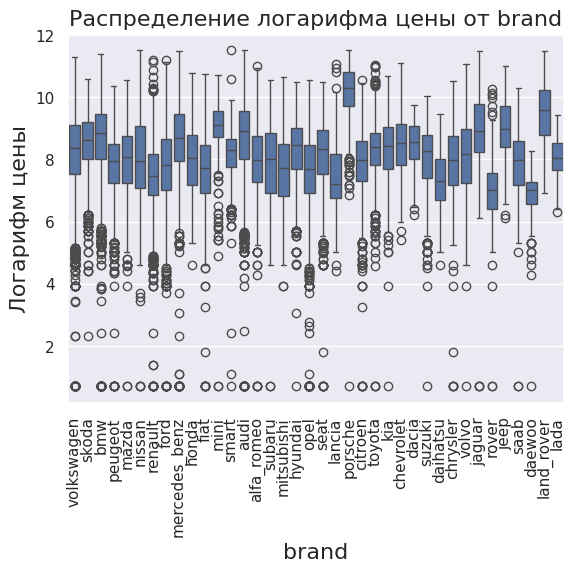

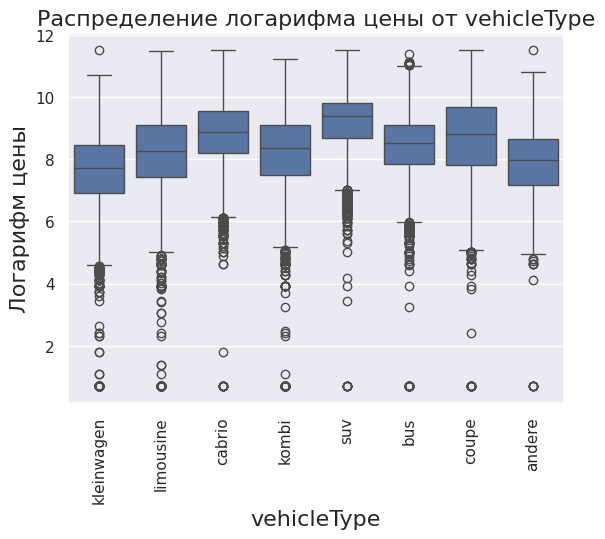

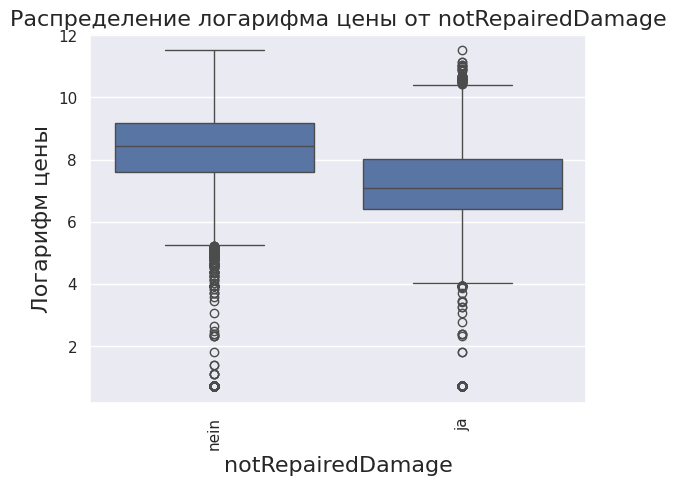

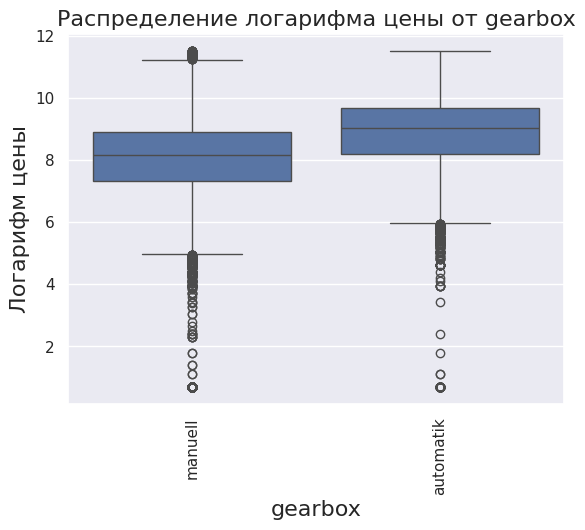

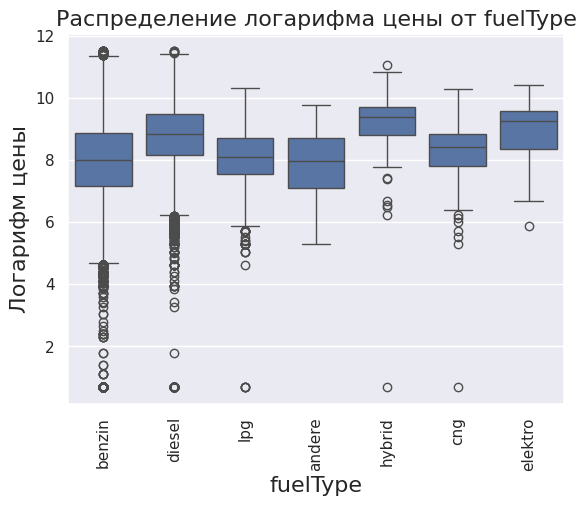

In [15]:
for name in ['brand', 'vehicleType', 'notRepairedDamage', 'gearbox', 'fuelType']:
    sns.boxplot(data=data, x=name, y="log_price")
    plt.xlabel(name, fontsize=16)
    plt.ylabel('Логарифм цены', fontsize=16)
    plt.xticks(rotation=90)
    plt.title('Распределение логарифма цены от ' + name, fontsize=16)
    plt.show()

У машин много разновидностей моделей, поэтому сложно оценить ее влияние. Однако очевидно, что модель машины имеет вес в формировании цены.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


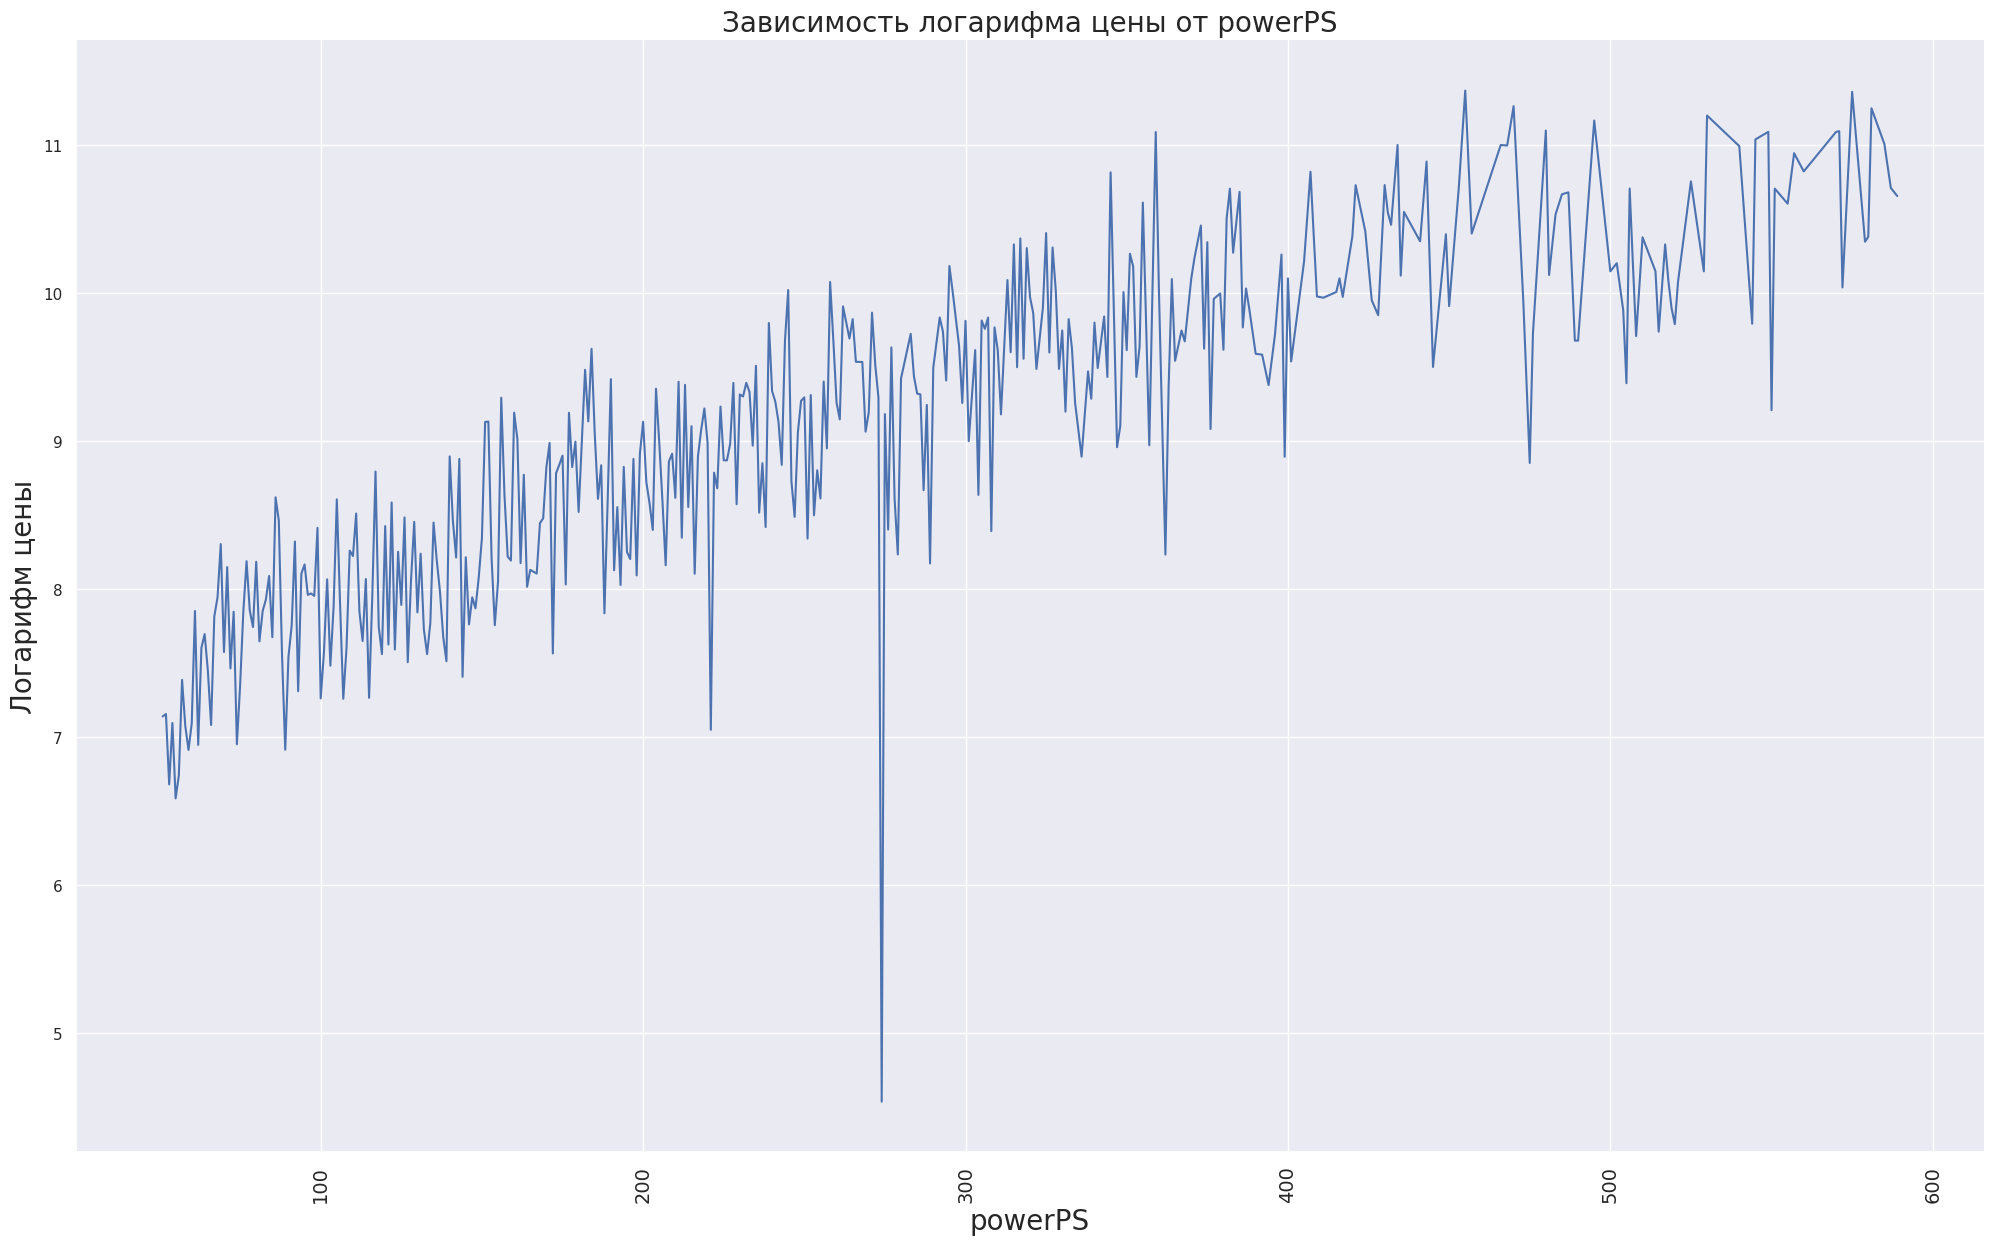

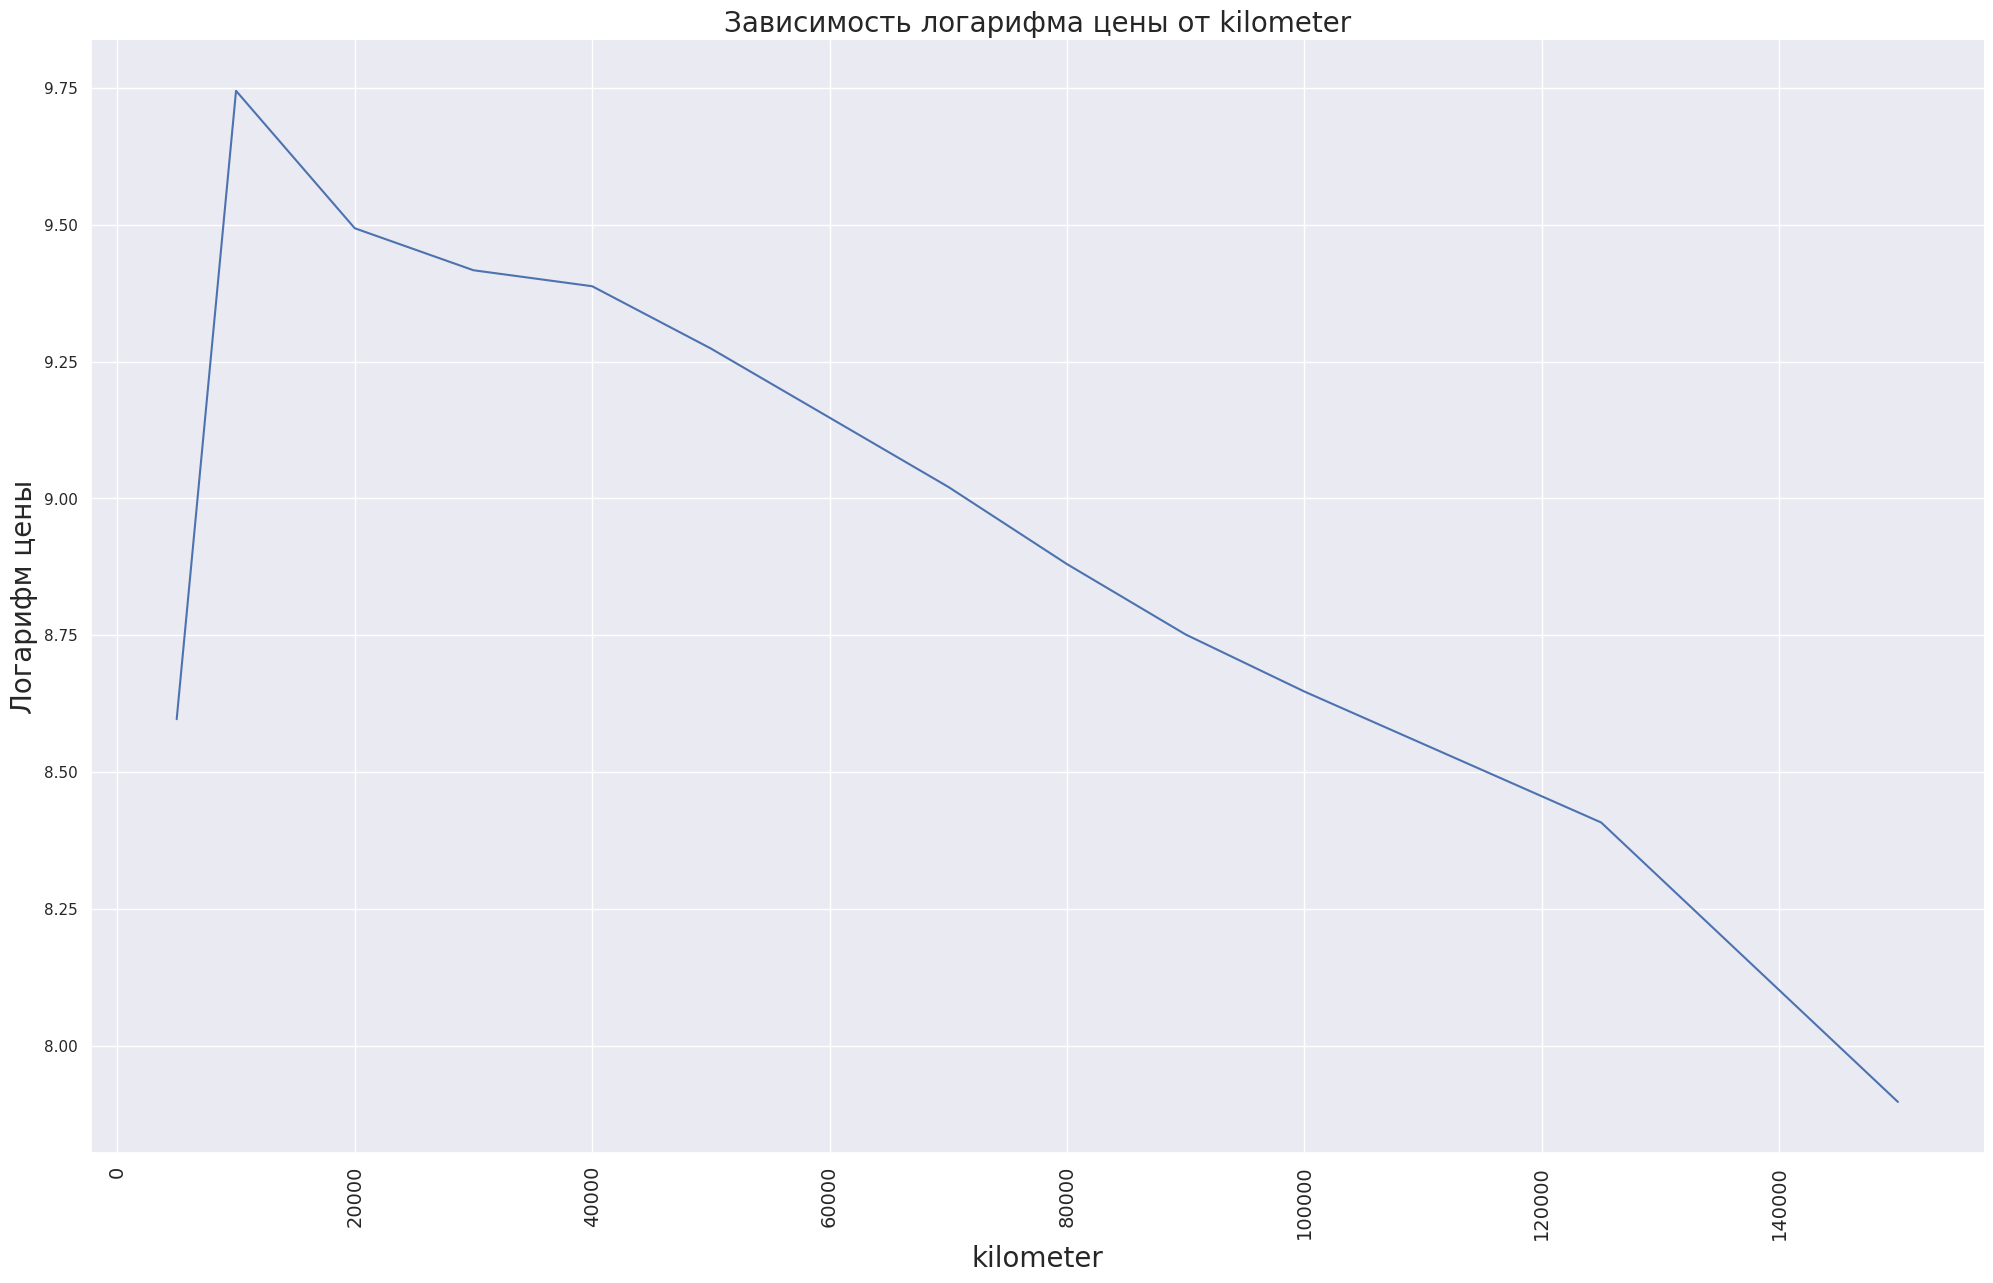

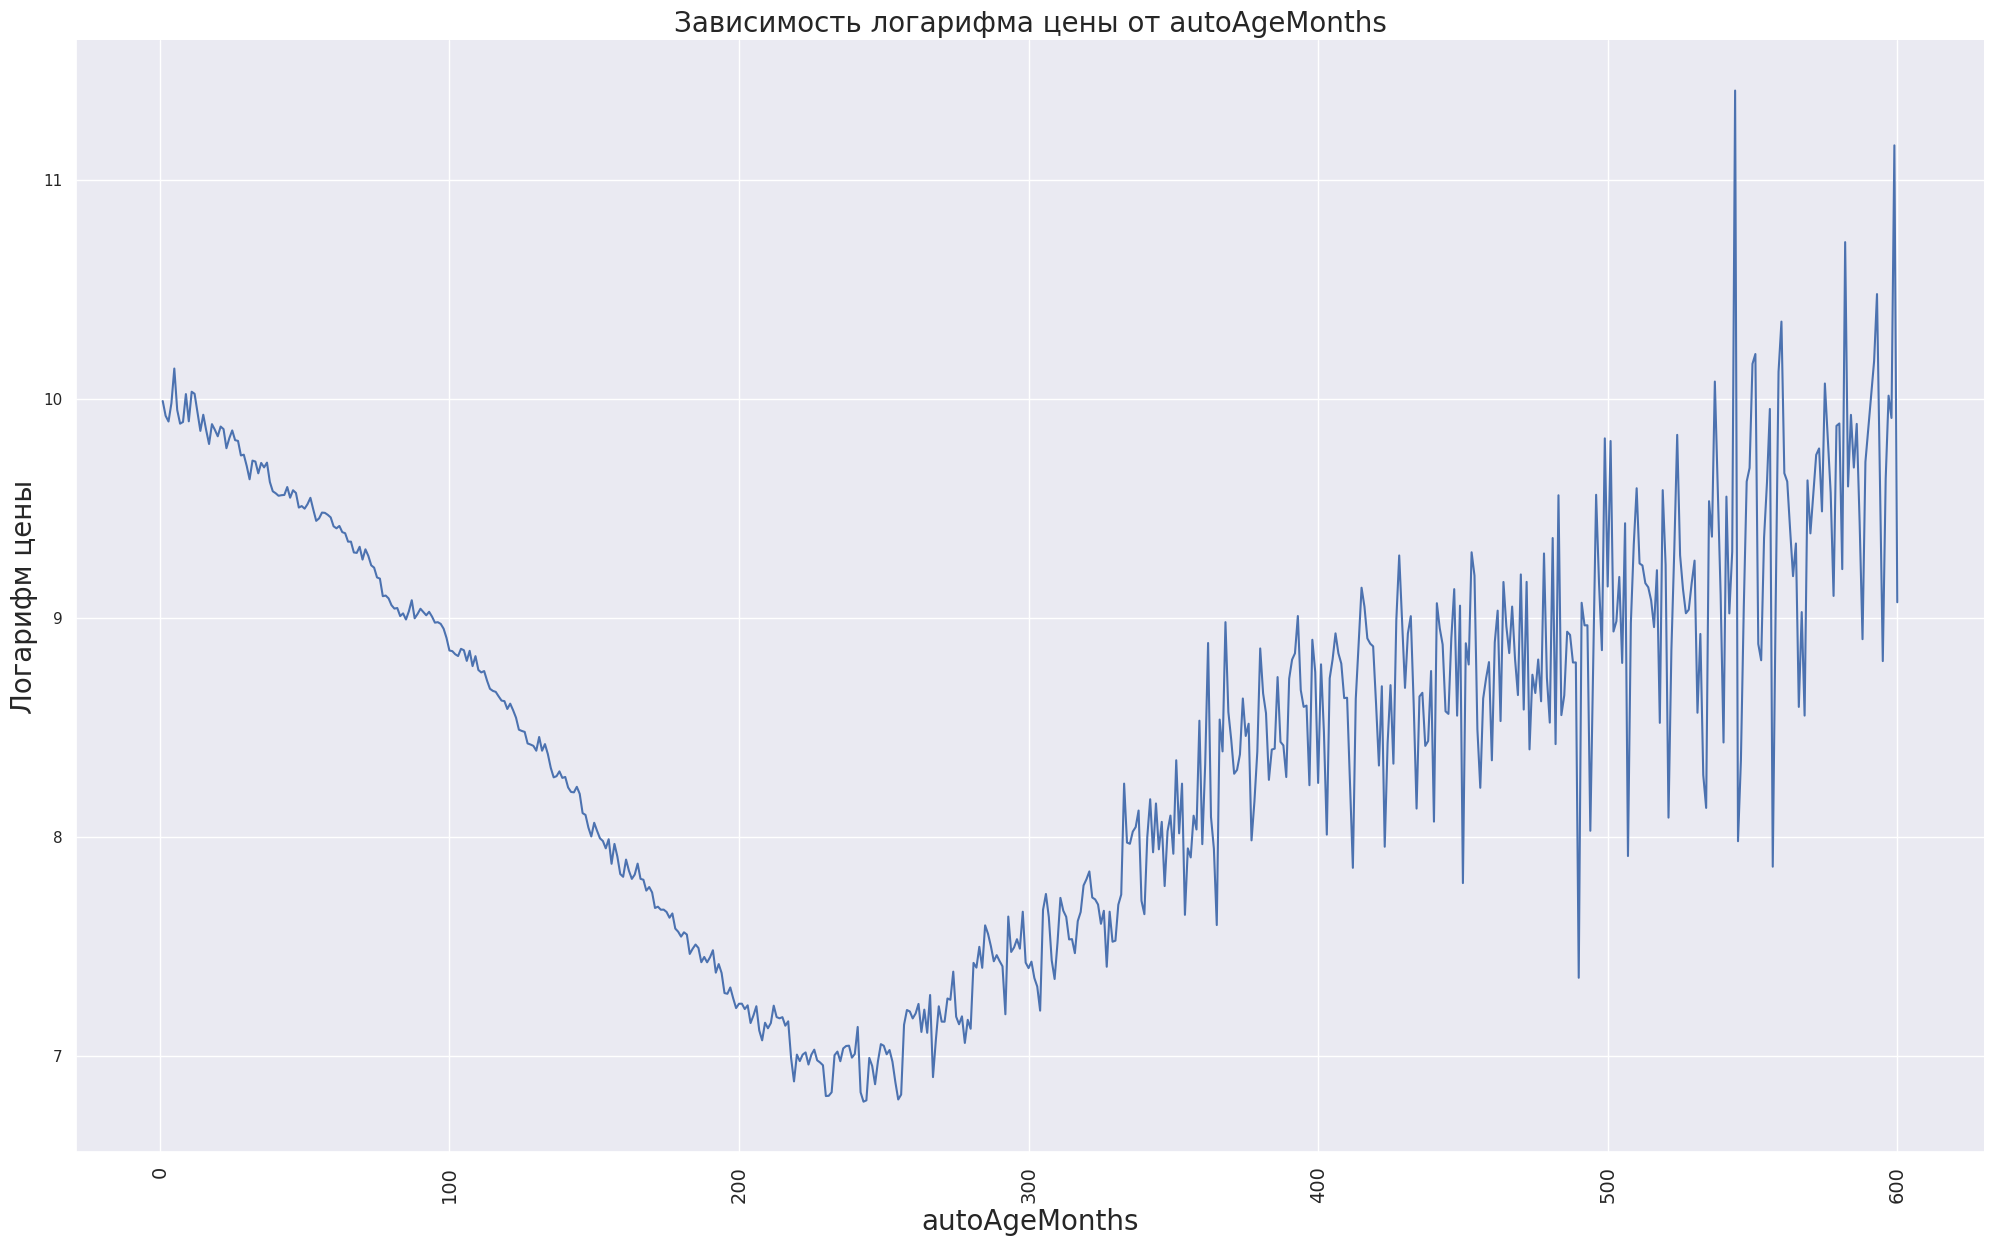

In [16]:
for name in numeric:
    sns.relplot(x=name, y='log_price',data=data, kind="line", ci=None, height=12, aspect=10/6)
    plt.title(f"Зависимость логарифма цены от {name}", fontsize=20)
    plt.xlabel(name, fontsize=20)
    plt.xticks(rotation=90, fontsize=14)
    plt.ylabel("Логарифм цены", fontsize=20)

Отметим, что есть выбросы с неправдоподобно маленькой ценой машины. Избавимся от них

In [17]:
data = data[data['log_price'] >= 4]
data = data[data['price'] <= 60000]

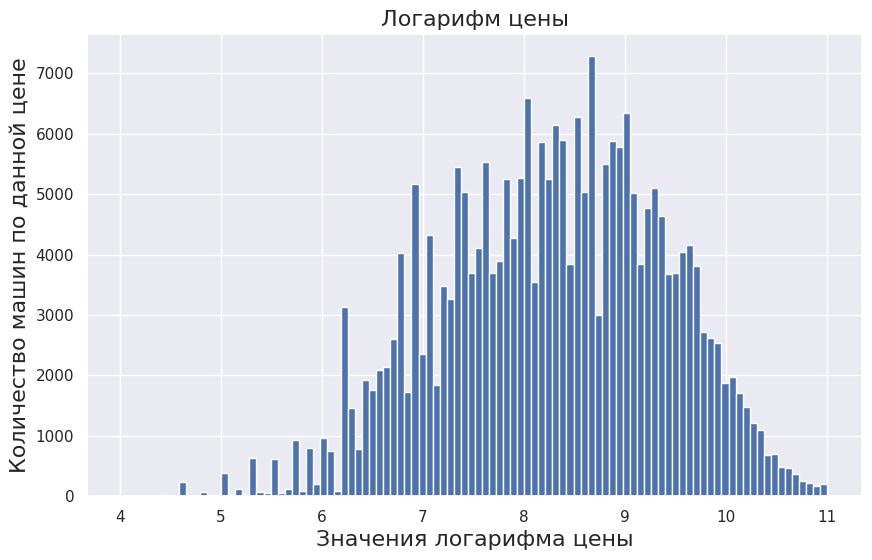

In [18]:
plt.figure(figsize = (10, 6))
plt.hist(data['log_price'], bins=100)
plt.xlabel('Значения логарифма цены', fontsize=16)
plt.ylabel('Количество машин по данной цене', fontsize=16)
plt.title('Логарифм цены', fontsize=16)
plt.show()

In [19]:
data['price'] = data['log_price']

In [20]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [22]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.875, random_state=10)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [23]:
# YOUR CODE:
from descents import get_descent
from linear_regression import LinearRegression

In [24]:
from sklearn.metrics import r2_score

lamdas = np.logspace(-4, 1, 20)
methods = ["full", "stochastic", "momentum", "adam"]
best_lamdas = []
lamdas_history = []
for method in methods:
    min_err = 1e20
    best_lamda = 1
    lamda_history = []
    r2_err = 0

    for lamda in lamdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': x.shape[1],
                'lambda_' : lamda
            }
        }
        regres = LinearRegression(
            descent_config=descent_config,
        )
        regres.fit(x_train, y_train.to_numpy())
        err = regres.calc_loss(x_val, y_val.to_numpy())

        if min_err > err:
            best_lamda = lamda
            r2_err = r2_score(y_val, regres.predict(x_val))
            min_err = err
            lamda_history = regres.loss_history
    print(method)
    print('R^2:', r2_err)
    print('lamda:', best_lamda)
    best_lamdas.append(best_lamda)
    print('Длина сходимости:', len(lamda_history))
    lamdas_history.append(lamda_history)
    print('Ошибка:', min_err)
    print()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:80: RuntimeWarning: overflow encountered in square
  return ((y_pred - y) ** 2).mean()


full
R^2: 0.7334229654271234
lamda: 1.623776739188721
Длина сходимости: 72
Ошибка: 0.3320010016169842



/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:80: RuntimeWarning: overflow encountered in square
  return ((y_pred - y) ** 2).mean()


stochastic
R^2: 0.716630313013477
lamda: 0.4832930238571752
Длина сходимости: 246
Ошибка: 0.35291494654877215



/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:80: RuntimeWarning: overflow encountered in square
  return ((y_pred - y) ** 2).mean()


momentum
R^2: 0.7659155494128325
lamda: 0.8858667904100823
Длина сходимости: 110
Ошибка: 0.29153401073135227

adam
R^2: 0.7840064238946942
lamda: 5.455594781168514
Длина сходимости: 181
Ошибка: 0.26900323099734896



### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

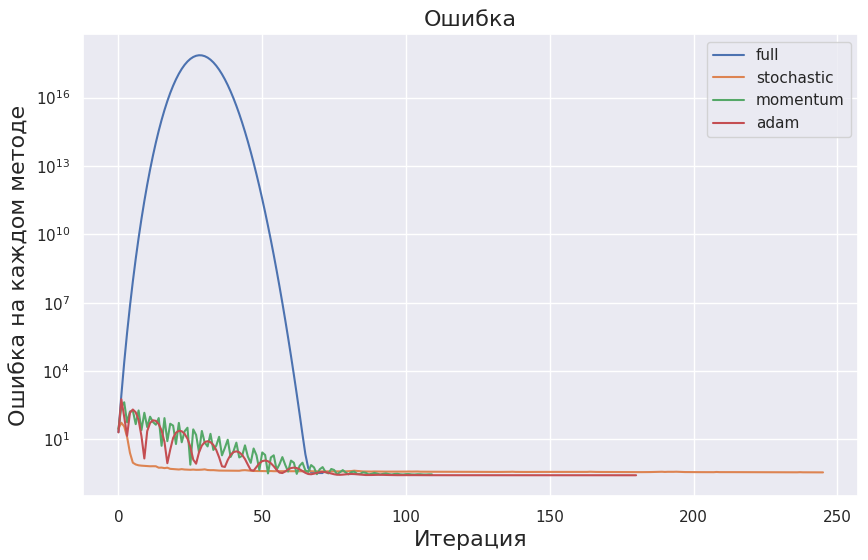

In [25]:
# YOUR CODE:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(lamdas_history[i], label=methods[i])
plt.ylabel("Ошибка на каждом методе", fontsize=16)
plt.yscale("log")
plt.xlabel("Итерация", fontsize=16)
plt.title("Ошибка", fontsize=16)
plt.legend()
plt.show()

`### ваше решение тут ###`

full - вначале мы видим большой скачок и получаем большую ошибку. После он быстро реабилитируется и приближается к минимуму , быстрее остальных.

stochastic - быстро приближается к минимуму, но достигает медленно. Наверно из-за того, что двигается немного не в ту сторону.

momentum - становится более гладким по мере увеличения количества операций.

adam - имеет наименьшую ошибку, но можно заметить большие скачки в ошибке.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [26]:
batch_sizes = np.arange(5, 500, 10)

# YOUR CODE:
import time
from tqdm import tqdm

iters_ = []
spend_time_ = []

for sz in tqdm(batch_sizes):
    spend_time = time.time()
    iters = 0
    for i in range(10):
        descent_config = {
            'descent_name': "stochastic",
            'kwargs': {
                'dimension': x.shape[1],
                'lambda_' : best_lamdas[1],
                'batch_size': sz
            }
        }
        regres = LinearRegression(
            descent_config=descent_config,
        )
        regres.fit(x_train, y_train.to_numpy())
        err = regres.calc_loss(x_val, y_val.to_numpy())
        iters += len(regres.loss_history)
    spend_time = time.time() - spend_time
    spend_time_.append(spend_time / 10)
    iters_.append(iters / 10)

100%|██████████| 50/50 [03:30<00:00,  4.21s/it]


Text(0.5, 1.0, 'Потраченное время в зависимоти от размера батча')

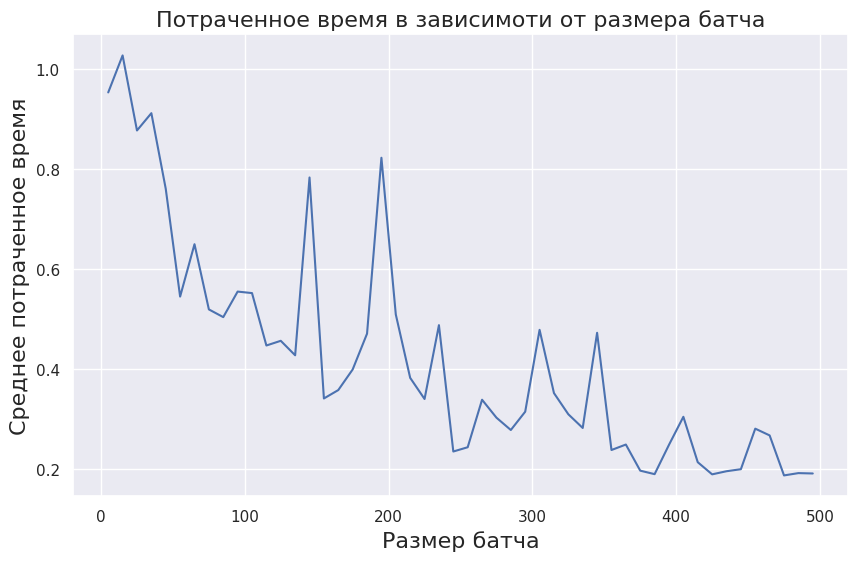

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, spend_time_)
plt.ylabel("Среднее потраченное время", fontsize=16)
plt.xlabel("Размер батча", fontsize=16)
plt.title("Потраченное время в зависимоти от размера батча", fontsize=16)

Text(0.5, 1.0, 'Количество итераций от размера батча')

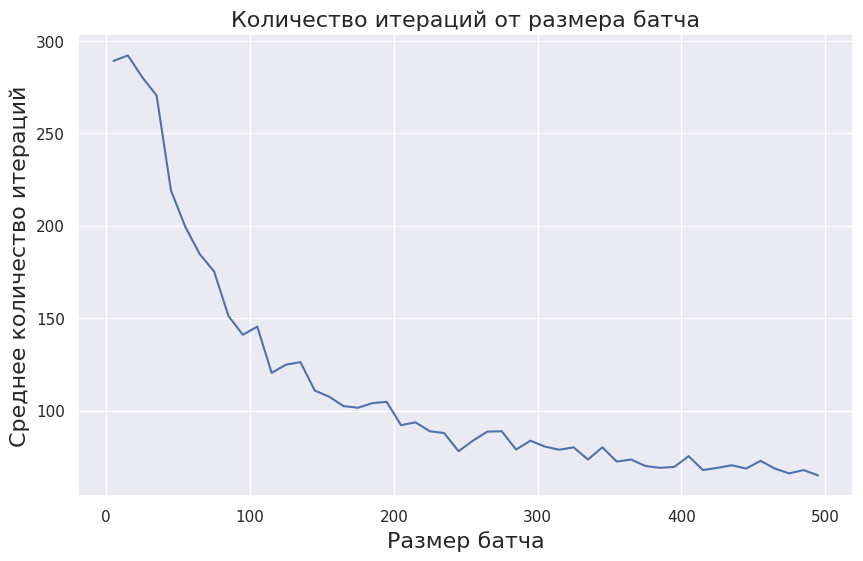

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, iters_)
plt.ylabel("Среднее количество итераций", fontsize=16)
plt.xlabel("Размер батча", fontsize=16)
plt.title("Количество итераций от размера батча", fontsize=16)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


`### ваше решение тут ###`

При увеличении размера батча скорость работы растет. Но чем больше растет размер батча, тем меньше "производная", т.е. скорость роста функции падает.


## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [29]:
# YOUR CODE:

lamdas = np.logspace(-4, 1, 10)
mus = np.logspace(-4, 0, 10)
methods = ["full", "stochastic", "momentum", "adam"]
best_lamdas = []
best_mus = []
mus_history = []
for method in methods:
    min_err = 1e20
    best_lamda = 1
    best_mu = 1
    lamda_history = []
    r2_err = 0

    for lamda in lamdas:
        for mu in mus:
            descent_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': {
                    'dimension': x.shape[1],
                    'lambda_' : lamda,
                    'mu': mu
                }
            }
            regres = LinearRegression(
                descent_config=descent_config,
            )
            regres.fit(x_train, y_train.to_numpy())
            err = regres.calc_loss(x_val, y_val.to_numpy())

            if min_err > err:
                best_lamda = lamda
                best_mu = mu
                r2_err = r2_score(y_val, regres.predict(x_val))
                min_err = err
                lamda_history = regres.loss_history
    print(method)
    print('R^2:', r2_err)
    print('lamda:', best_lamda)
    best_lamdas.append(best_lamda)
    print('mu:', best_mu)
    best_mus.append(best_mu)
    print('Длина сходимости:', len(lamda_history))
    mus_history.append(lamda_history)
    print('Ошибка:', min_err)
    print()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:80: RuntimeWarning: overflow encountered in square
  return ((y_pred - y) ** 2).mean()


full
R^2: 0.7580056772205819
lamda: 2.782559402207126
mu: 0.005994842503189409
Длина сходимости: 216
Ошибка: 0.3013851424865583



/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/content/descents.py:80: RuntimeWarning: overflow encountered in square
  return ((y_pred - y) ** 2).mean()


stochastic
R^2: 0.7327170029357193
lamda: 0.7742636826811278
mu: 0.005994842503189409
Длина сходимости: 301
Ошибка: 0.3328802230946546

momentum
R^2: 0.7723664457243516
lamda: 0.7742636826811278
mu: 0.002154434690031882
Длина сходимости: 218
Ошибка: 0.28349992017218895

adam
R^2: 0.7834749895868065
lamda: 2.782559402207126
mu: 0.0001
Длина сходимости: 301
Ошибка: 0.2696650911714447



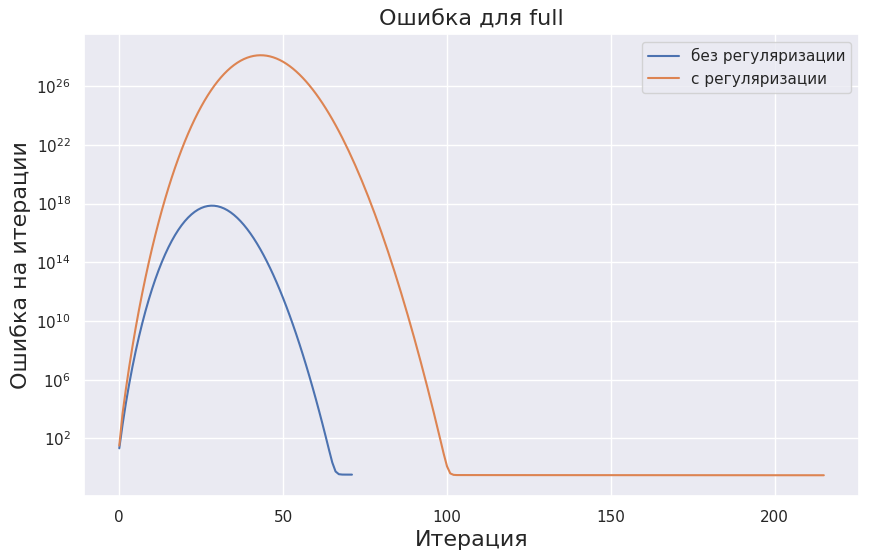

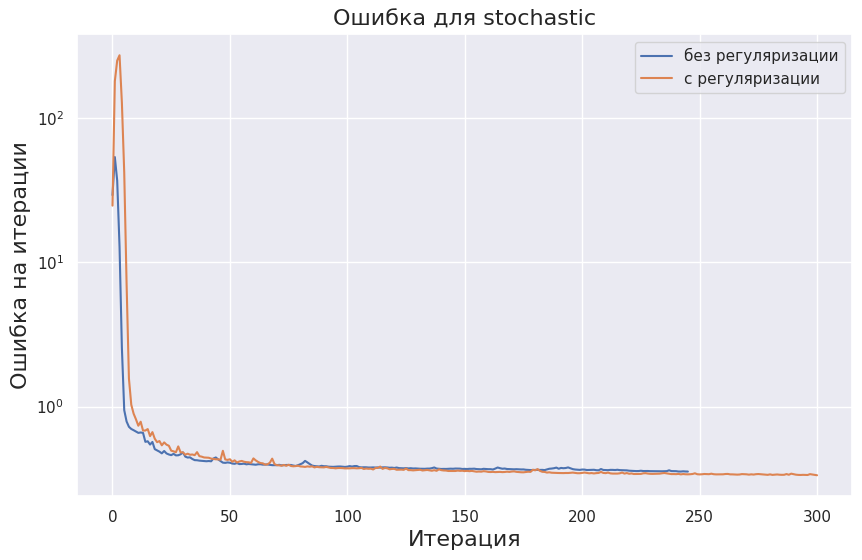

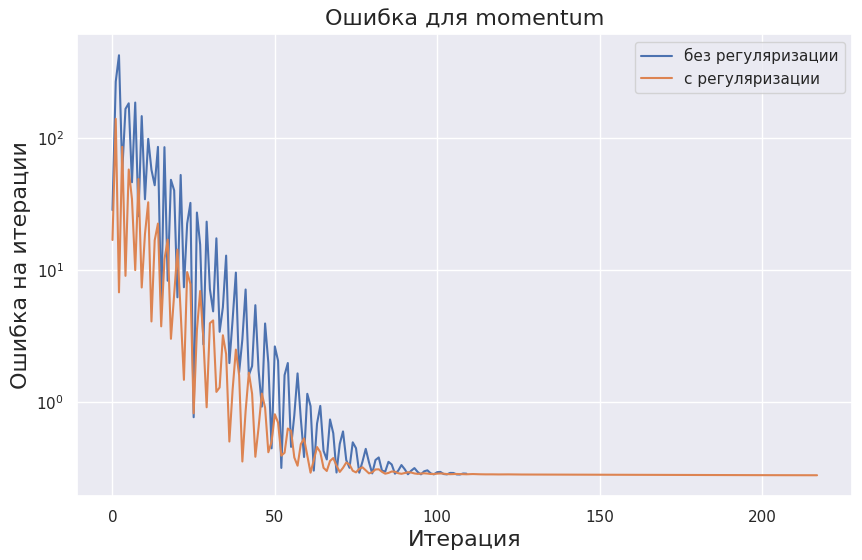

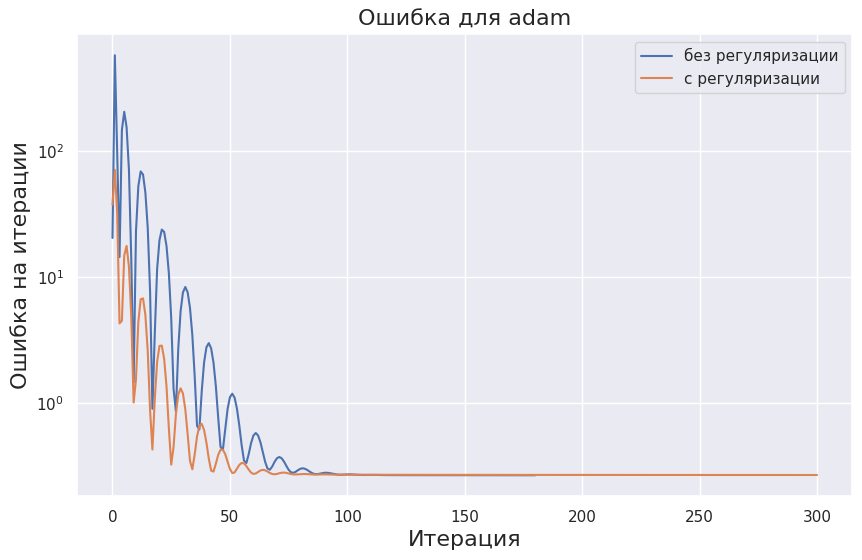

In [30]:
for i in range(4):
    plt.figure(figsize=(10, 6))
    plt.plot(lamdas_history[i], label='без регуляризации')
    plt.plot(mus_history[i], label='c регуляризации')
    plt.ylabel("Ошибка на итерации", fontsize=16)
    plt.xlabel("Итерация", fontsize=16)
    plt.yscale("log")
    plt.title("Ошибка для "+ methods[i], fontsize=16)
    plt.legend()
    plt.show()

`### ваше решение тут ###`

Обычно регуляризация нужна для защиты от переобучения, но ошибки поменялись несильно и количество выполняемых итераций возрасло.В данном случае можно обойтись и без регуляризации.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [31]:

from descents import LossFunction

lamdas = np.logspace(-4, 1, 20)
methods = ["full", "stochastic", "momentum", "adam"]
best_lamdas = []
lamdas_history_logcosh = []
for method in methods:
    min_err = 1e20
    best_lamda = 1
    lamda_history = []
    r2_err = 0

    for lamda in lamdas:
        descent_config = {
            'descent_name': method,
            'kwargs': {
                'dimension': x.shape[1],
                'lambda_' : lamda,
                'loss_function': LossFunction.LogCosh
            }
        }
        regres = LinearRegression(
            descent_config=descent_config,
        )
        regres.fit(x_train, y_train.to_numpy())
        err = regres.calc_loss(x_val, y_val.to_numpy())

        if min_err > err:
            best_lamda = lamda
            r2_err = r2_score(y_val, regres.predict(x_val))
            min_err = err
            lamda_history = regres.loss_history
    print(method)
    print('R^2:', r2_err)
    print('lamda:', best_lamda)
    best_lamdas.append(best_lamda)
    print('Длина сходимости:', len(lamda_history))
    lamdas_history_logcosh.append(lamda_history)
    print('Ошибка:', min_err)
    print()

full
R^2: 0.7388424991696411
lamda: 10.0
Длина сходимости: 243
Ошибка: 0.12040668110946423

stochastic
R^2: 0.7503094470543487
lamda: 5.455594781168514
Длина сходимости: 301
Ошибка: 0.11887014885587997

momentum
R^2: 0.7673222278162781
lamda: 5.455594781168514
Длина сходимости: 163
Ошибка: 0.10733865875807917

adam
R^2: 0.777332838218479
lamda: 10.0
Длина сходимости: 278
Ошибка: 0.10366428371099842



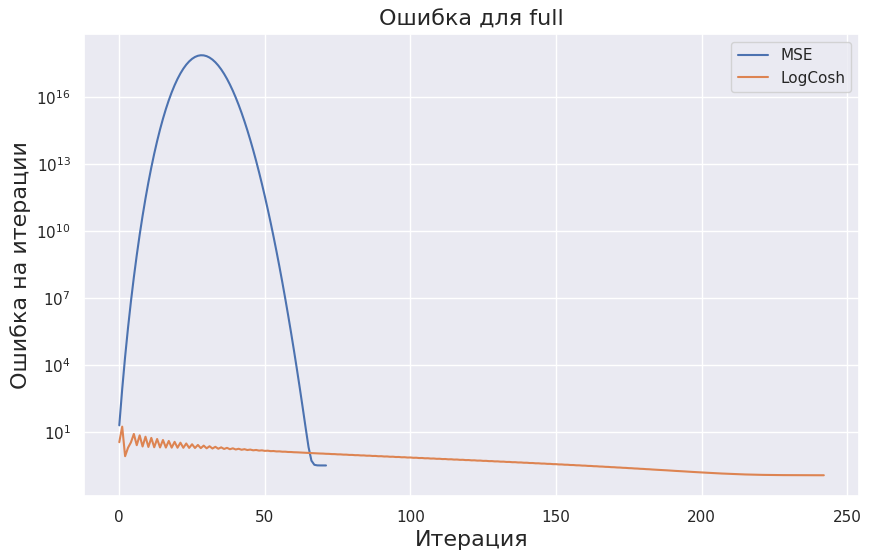

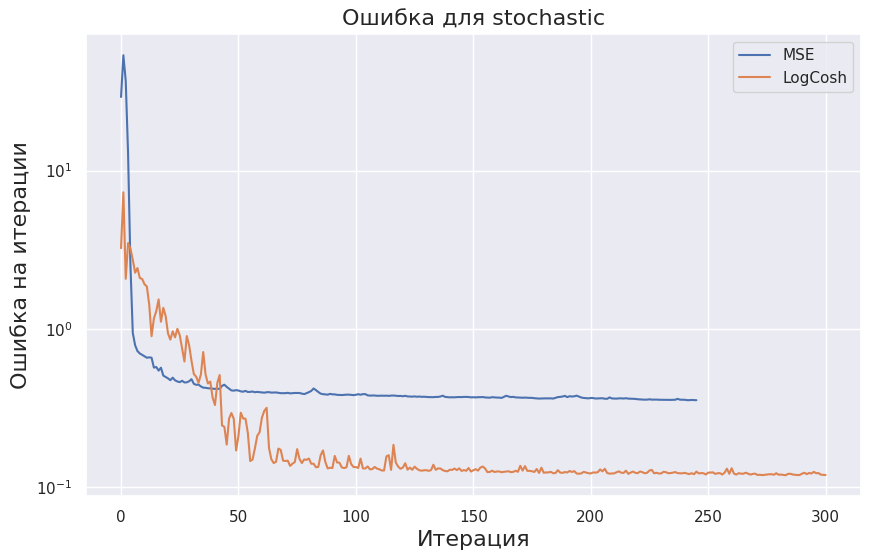

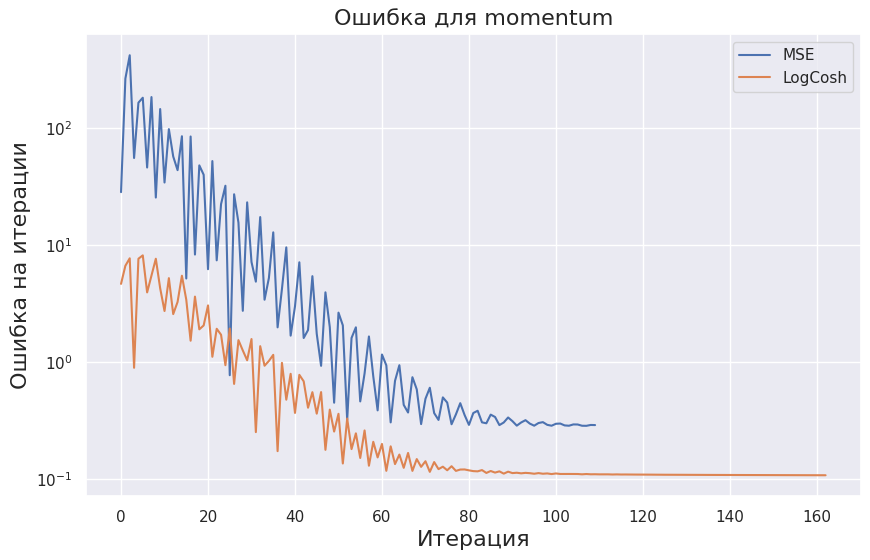

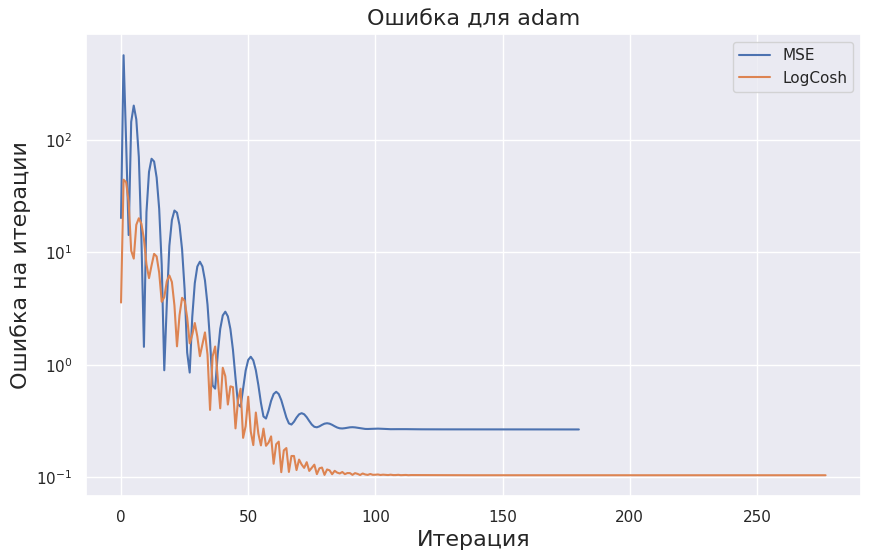

In [32]:
for i in range(4):
    plt.figure(figsize=(10, 6))
    plt.plot(lamdas_history[i], label='MSE')
    plt.plot(lamdas_history_logcosh[i], label='LogCosh')
    plt.ylabel("Ошибка на итерации", fontsize=16)
    plt.xlabel("Итерация", fontsize=16)
    plt.yscale("log")
    plt.title("Ошибка для "+ methods[i], fontsize=16)
    plt.legend()
    plt.show()

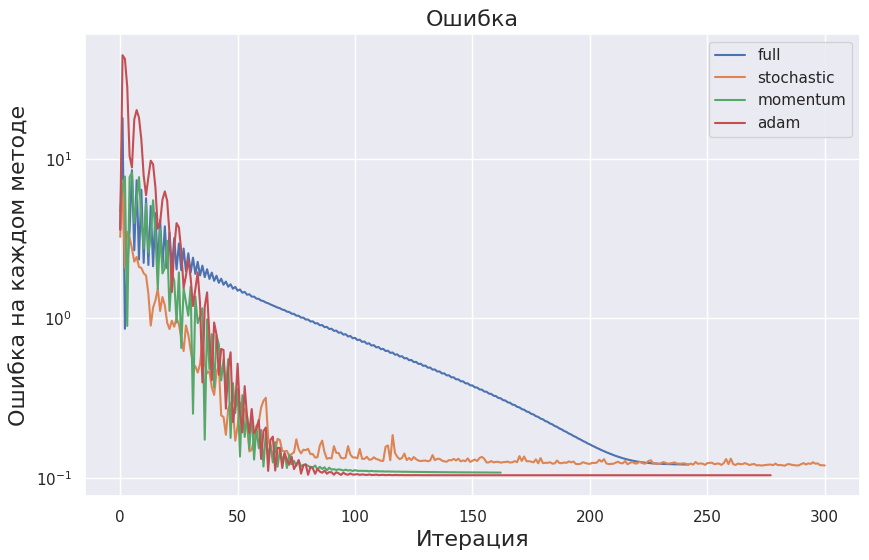

In [33]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(lamdas_history_logcosh[i], label=methods[i])
plt.ylabel("Ошибка на каждом методе", fontsize=16)
plt.yscale("log")
plt.xlabel("Итерация", fontsize=16)
plt.title("Ошибка", fontsize=16)
plt.legend()
plt.show()

Лучше всего справляется LogCosh

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

В общем, я взяла рецепт из инстаграмма, он сам меня нашел и попался мне в рилсах. Это что-то типо тыквенного чизкейка в ПП версии. Очень важно отметить, что я помешана на ПП и стараюсь регулировать количество сахара в моих блюдах. Так что в этом десерте мне очень понравился состав, вместо подсластителя я использовала сироп агавы. Тыква у меня напрямую асоциируется с осенью, поэтому я очень обрадовалась, увидев ее в составе десерта. В ней просто куча полезных для здоровья веществ.

В качестве подопытного кролика для апробации моего творения я выбрала свою близкую подругу Веронику. Она оценила десерт как "Восхитительный". Так что вот, и задачки по МО решать могу, и тортики печь тоже! Чем не идеальная девушка?

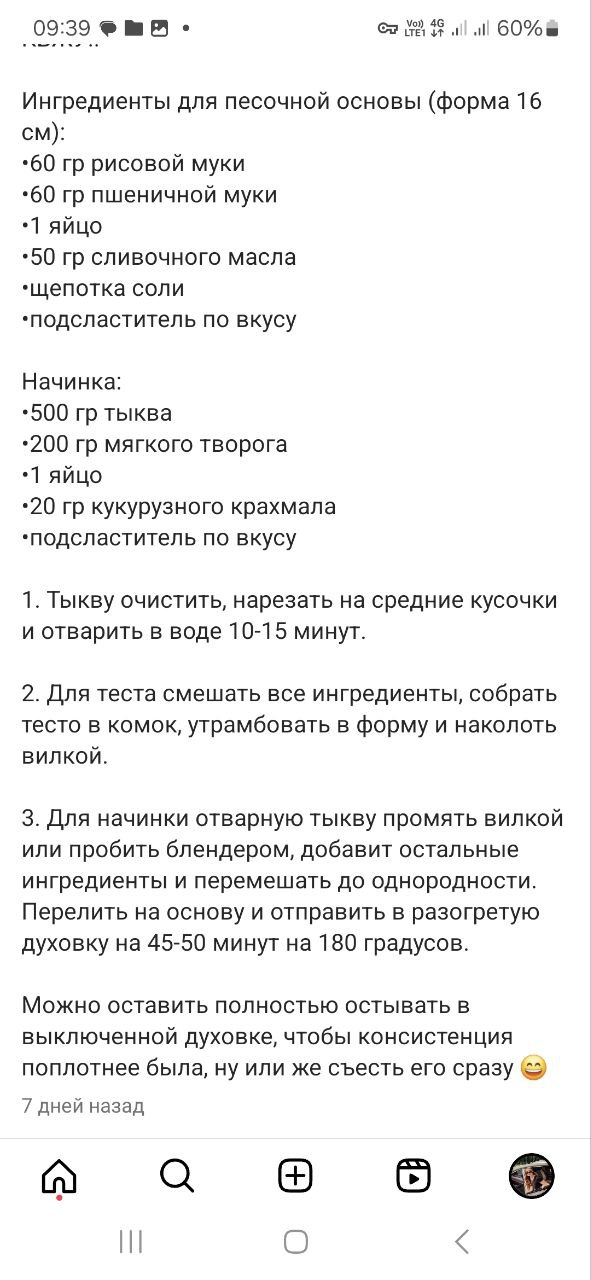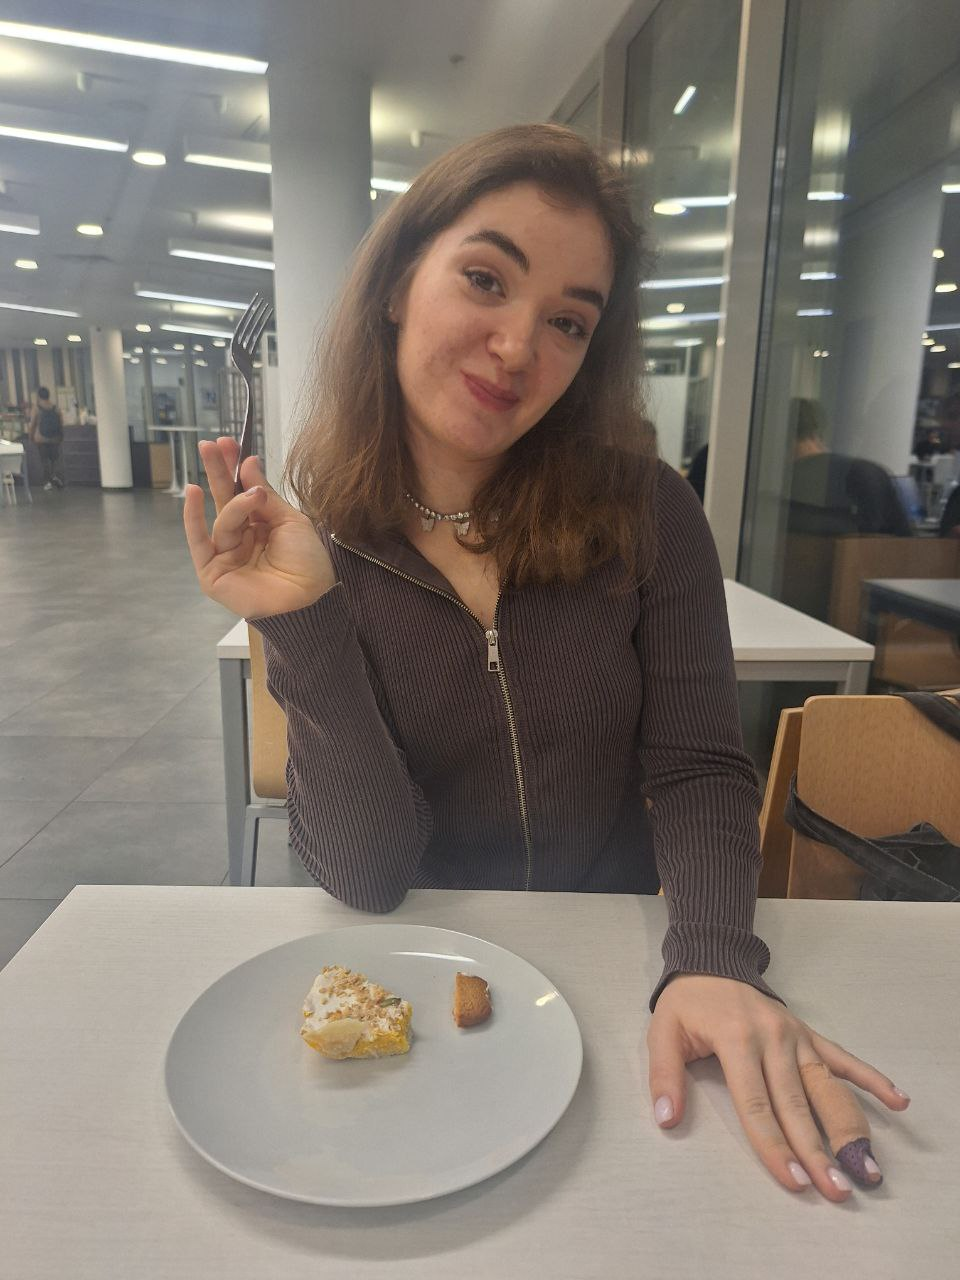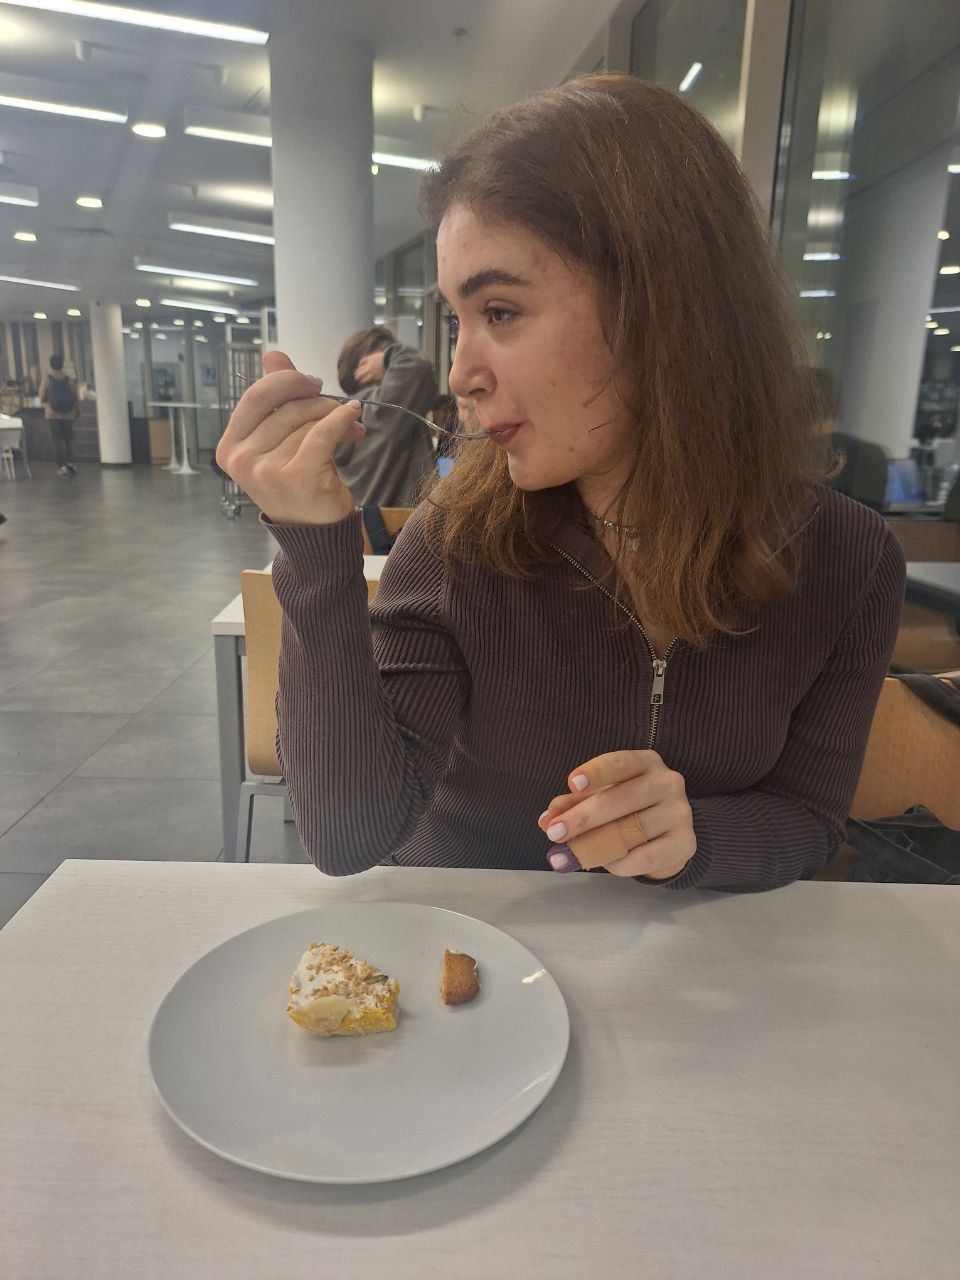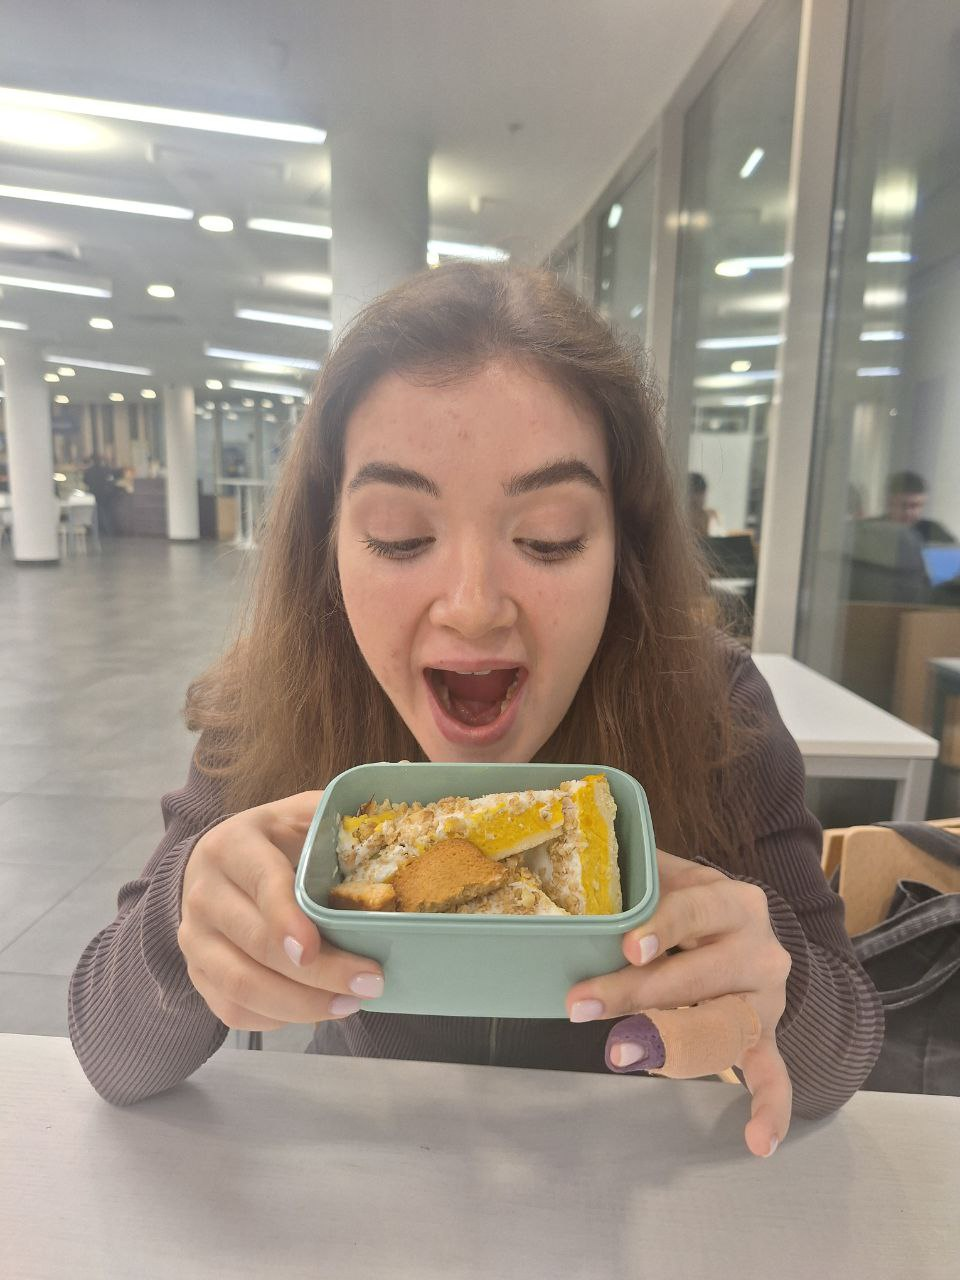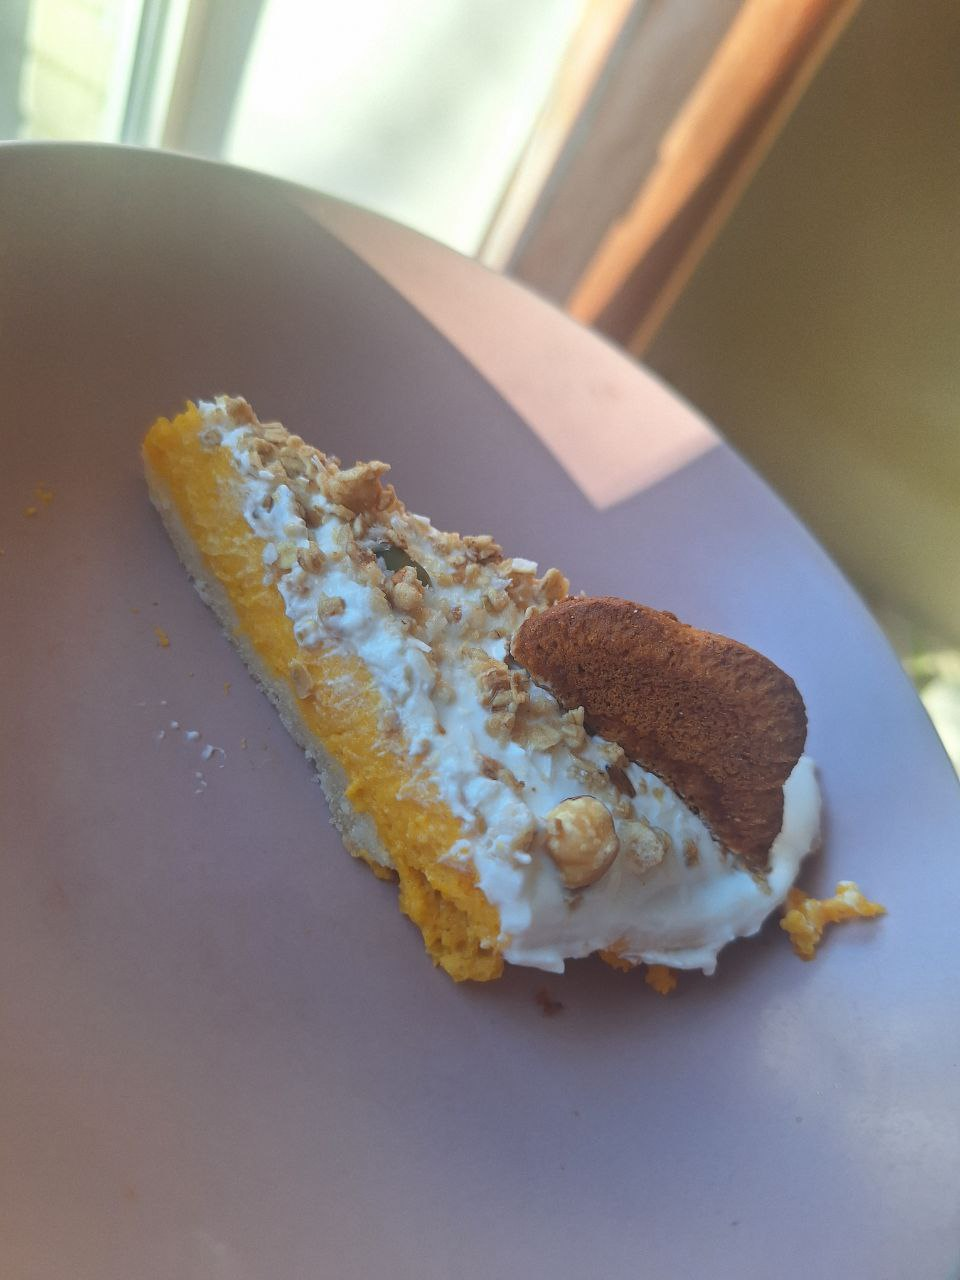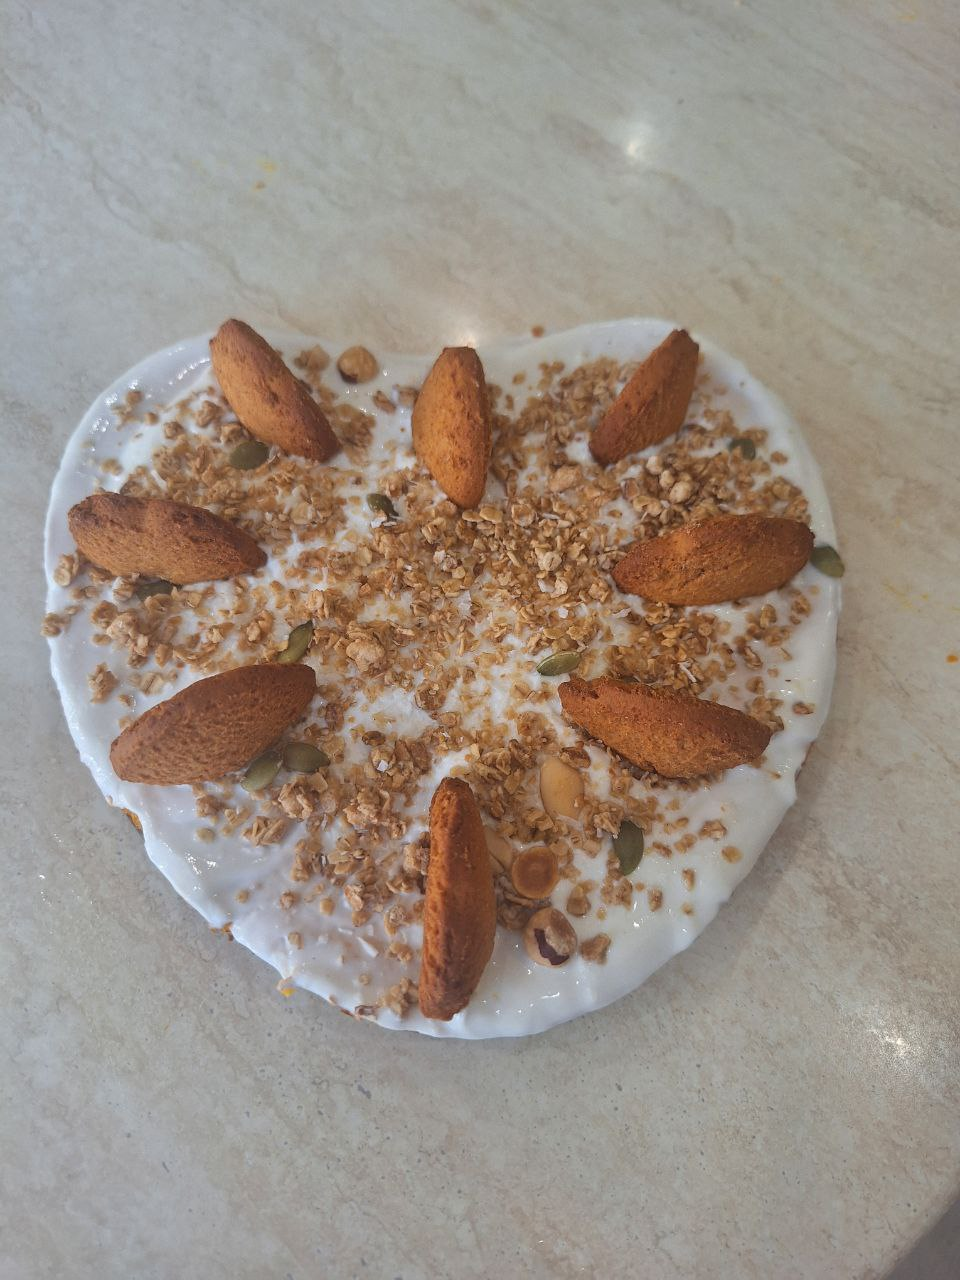

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: